# images.imutil

The images.imutil package provides general FITS image tools such as header editing and image arithmetic.

<a id='notes'></a>

## Notes

**For questions or comments please see** [our github page](https://github.com/spacetelescope/stak).  **We encourage and appreciate user feedback.**

**Most of these notebooks rely on basic knowledge of the Astropy FITS I/O module.  If you are unfamiliar with this module please see the** [Astropy FITS I/O user documentation](http://docs.astropy.org/en/stable/io/fits/) **before using this documentation**.

Contents:

* [chpixtype](#chpixtype)
* [hedit](#hedit)
* [hselect](#hselect)
* [imarith-imdivide](#imarith-imdivide)
* [imcopy](#imcopy)
* [imfunction-imexpr](#imfunction-imexpr)
* [imheader](#imheader)
* [imhistogram](#imhistogram)
* [imreplace](#imreplace)
* [imslice](#imslice)
* [imstack](#imstack)
* [imstatistics](#imstatistics)
* [imsum](#imsum)
* [listpixels](#listpixels)

<br>

<a id='chpixtype'></a>

## chpixtype

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Chpixtype is a task that allows you to change the pixel type of a FITS image.  There is built in functionality in ``astropy.io.fits`` to preform this task with the ``scale`` method.  Below you will find a table that translates the chpixtype newpixtype options into their equivalent [numpy/astropy type](http://docs.scipy.org/doc/numpy/user/basics.types.html).

**Type Conversions**

| Chpixtype  | Numpy/Astropy Type|
|:----------:|:-----------------:|
| ``ushort`` | ``uint16``        |
| ``short``  | ``int16``         |
| ``int``    | ``int32``         |
| ``long``   | ``int64``         |
| ``real``   | ``float32``       |
| ``double`` | ``float64``       |


In [2]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [29]:
# Change this value to your desired data file, here were creating a filename
# for our new changed data
orig_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
new_data = 'iczgs3ygq_newdtype_flt.fits'

# Read in your FITS file
hdu = fits.open(orig_data)

# Print info about FITS file
hdu.info()

# Edit the datatype for the first sci extension
hdu[1].scale(type='int32')

# Save changed hdu object to new file
# The overwrite argument tells the writeto method to overwrite if file already exists
hdu.writeto(new_data, overwrite=True)
hdu.close()

Filename: /eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     266   ()      
  1  SCI           1 ImageHDU       140   (1014, 1014)   float32   
  2  ERR           1 ImageHDU        51   (1014, 1014)   float32   
  3  DQ            1 ImageHDU        43   (1014, 1014)   int16   
  4  SAMP          1 ImageHDU        37   (1014, 1014)   int16   
  5  TIME          1 ImageHDU        37   (1014, 1014)   float32   
  6  WCSCORR       1 BinTableHDU     59   7R x 24C   [40A, I, A, 24A, 24A, 24A, 24A, D, D, D, D, D, D, D, D, 24A, 24A, D, D, D, D, J, 40A, 128A]   
<class 'astropy.io.fits.hdu.hdulist.HDUList'>


<br>

<a id='hedit'></a>

## hedit

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The hedit task allows users to edit an image header.  This functioanlity is covered in ``astropy.io.fits``.  Take note that to make changes to a FITS file, you must use the ``mode='update'`` keyword in the ``fits.open`` call. The default mode for ``fits.open`` is `readonly`. Below you'll find examples of editing a keyword if it does/doesn't exist, and how to delete keywords from the header. Also provided is an example of updating multiple files at once using the [convience function setval](http://docs.astropy.org/en/stable/io/fits/api/files.html#setval).

For examples on printing/viewing header keywords please see [hselect](#hselect)

In [8]:
# Standard Imports
from glob import glob

# Astronomy Specific Imports
from astropy.io import fits

In [9]:
# Change this value to your desired data file
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Open FITS file, include the mode='update' keyword
hdu = fits.open(test_data, mode='update')

# Simple header change, will add keyword if it doesn't exist
hdu[0].header['MYKEY1'] = 'Editing this keyword'

# Only add keyword if it does not already exist:
if 'MYKEY2' not in hdu[0].header:
    hdu[0].header['MYKEY2'] = 'Also editing this'

# To delete keywords, first check if they exist:
if 'MYKEY2' in hdu[0].header:
    del hdu[0].header['MYKEY2']
    
# Close FITS file, this will save your changes
hdu.close()

Below we will show an example of how to update a keyword in multiple FITS files using the Astropy convenience function [astropy.io.fits.setval](http://docs.astropy.org/en/stable/io/fits/api/files.html#setval) and the [glob](https://docs.python.org/3/library/glob.html) function.  ``Astropy.io.fits.setval`` will add the keyword if it does not already exist.

In [10]:
# Change this value to your desired search
data_list = glob('/eng/ssb/iraf_transition/test_data/hedit/*.fits')

# Now we loop over the list of file and use the setval function to update keywords
# Here we update the keyword MYKEY1 value to the integer 5.
for filename in data_list:
    fits.setval(filename, 'MYKEY1', value=5)

<br>

<a id='hselect'></a>

## hselect

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The hselect task allows users to search for keyword values in the FITS headers. This functionality has been replaced by the [CCDProc ImageFileCollection class](http://ccdproc.readthedocs.io/en/stable/api/ccdproc.ImageFileCollection.html).  This class stores the header keyword values in an [Astropy Table object](http://docs.astropy.org/en/stable/table/index.html#module-astropy.table). There is also an executable script provided by Astropy called [fitsheader](http://docs.astropy.org/en/stable/io/fits/usage/scripts.html#module-astropy.io.fits.scripts.fitsheader). You'll find examples of both below.

If you wish to save your output to a text file, please see the [Astropy Table Documentation](http://docs.astropy.org/en/stable/table/io.html) and the [Astropy Unified I/O page](http://docs.astropy.org/en/stable/io/unified.html).

In [1]:
# Astronomy Specific Imports
from ccdproc import ImageFileCollection

In [2]:
# first we make the ImageFileCollection object
collec = ImageFileCollection('/eng/ssb/iraf_transition/test_data', 
                             keywords=["filetype","date","exptime","filter"],
                             glob_include="icz*.fits", ext=0)

# header keywords values are stored in an Astropy Table in the summary attribute 
out_table = collec.summary
out_table

file,filetype,date,exptime,filter
str27,str3,str10,float64,str5
iczgs3y5q_flt.fits,SCI,2016-06-02,652.937744,F125W
iczgs3ygq_flt.fits,SCI,2016-06-02,602.937317,F140W
iczgs3ygq_newdtype_flt.fits,SCI,2016-06-02,602.937317,F140W


In [3]:
# Now we can filter our table based on keyword values using Python bitwise operators
filtered_table = out_table[(out_table['exptime'] > 602) & (out_table['filter'] == 'F140W')]
filtered_table

file,filetype,date,exptime,filter
str27,str3,str10,float64,str5
iczgs3ygq_flt.fits,SCI,2016-06-02,602.937317,F140W
iczgs3ygq_newdtype_flt.fits,SCI,2016-06-02,602.937317,F140W


In [4]:
# Now let's extract the filename list from our filtered table into a python List object
filelist = filtered_table['file'].data
print(filelist)

for filename in filelist:
    print(filename)
    # Do your analysis here

['iczgs3ygq_flt.fits' 'iczgs3ygq_newdtype_flt.fits']
iczgs3ygq_flt.fits
iczgs3ygq_newdtype_flt.fits


<br>

Also available is the Astropy executable script fitsheader.  Fitsheader can be run from the command line.

In [5]:
# the "!" character tells the notebook to run this command as if it were in a terminal window
!fitsheader --help

usage: fitsheader [-h] [-e HDU] [-k KEYWORD] [-t [FORMAT]] [-c]
                  filename [filename ...]

Print the header(s) of a FITS file. Optional arguments allow the desired
extension(s), keyword(s), and output format to be specified. Note that in the
case of a compressed image, the decompressed header is shown by default.

positional arguments:
  filename              path to one or more files; wildcards are supported

optional arguments:
  -h, --help            show this help message and exit
  -e HDU, --extension HDU
                        specify the extension by name or number; this argument
                        can be repeated to select multiple extensions
  -k KEYWORD, --keyword KEYWORD
                        specify a keyword; this argument can be repeated to
                        select multiple keywords; also supports wildcards
  -t [FORMAT], --table [FORMAT]
                        print the header(s) in machine-readable table format;
                        the

In [6]:
# print out only the keyword names that match FILE* or NAXIS*
!fitsheader --keyword FILE* --keyword NAXIS* /eng/ssb/iraf_transition/test_data/hedit/*.fits

# HDU 0 in /eng/ssb/iraf_transition/test_data/hedit/jczgx1ppq_flc.fits:
FILENAME= 'jczgx1ppq_flc.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
NAXIS   =                    0                                                  

# HDU 1 in /eng/ssb/iraf_transition/test_data/hedit/jczgx1ppq_flc.fits:
NAXIS   =                    2                                                  
NAXIS1  =                 4096                                                  
NAXIS2  =                 2048                                                  

# HDU 2 in /eng/ssb/iraf_transition/test_data/hedit/jczgx1ppq_flc.fits:
NAXIS   =                    2                                                  
NAXIS1  =                 4096                                                  
NAXIS2  =                 2048                                                  

# HDU 3 in /eng/ssb/iraf_transition/test_data/hedit/

In [7]:
# print out only the first extension and keyword names that match FILE* or NAXIS*
!fitsheader --extension 0 --keyword FILE* --keyword NAXIS* /eng/ssb/iraf_transition/test_data/hedit/*.fits

# HDU 0 in /eng/ssb/iraf_transition/test_data/hedit/jczgx1ppq_flc.fits:
FILENAME= 'jczgx1ppq_flc.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
NAXIS   =                    0                                                  
# HDU 0 in /eng/ssb/iraf_transition/test_data/hedit/jczgx1q1q_flc.fits:
FILENAME= 'jczgx1q1q_flc.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
NAXIS   =                    0                                                  


<br>

<a id='imarith-imdivide'></a>

## imarith-imdivide

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imarith and imdivide both provide functionality to apply basic operators to whole image arrays.  This task can be achieved with basic ``astropy.io.fits`` functionality along with ``numpy`` array functionality. We show a few examples below.  In the first code cell we adding and dividing two image arrays together. In the second code cell we show how to use a data quality array to decide which image array values to replace with zero.

The basic operands (``+``,``-``,``/``,``*``) can all be used with an assignment operator in python (``+=``,``-=``,``/=``,``*=``). See http://www.tutorialspoint.com/python/python_basic_operators.htm for more details

In [3]:
# Astronomy Specific Imports
from astropy.io import fits

In [4]:
# Basic operands (+,-,/,*)
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
test_data2 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'
output_data = 'imarith_out.fits'
output_data2 = 'imarith_new.fits'


# Open FITS file
hdu1 = fits.open(test_data1)
hdu2 = fits.open(test_data2)

# Print information about the FITS file we opened
hdu1.info()
hdu2.info()

# Here we add hdu2-ext1 to hdu1-ext1 by using the shortcut += operator
hdu1[1].data += hdu2[1].data

# If you are dividing and need to avoid zeros in the image use indexing
indx_zeros = hdu2[1].data == 0
indx_nonzeros = hdu2[1].data != 0

# Set this value as you would the divzero parameter in imarith
# Here we're working with the error arrays of the image
set_zeros = 999.9
hdu1[2].data[indx_nonzeros] /= hdu2[2].data[indx_nonzeros]
hdu1[2].data[indx_zeros] = 999.9

# Save your new file
# The overwrite argument tells the writeto method to overwrite if file already exists
hdu1.writeto(output_data, overwrite=True)

# If you want to save you updated array to a new file with just the updated image array 
# we can repackage the extension into a new HDUList
image_array = hdu1[1].data
new_hdu = fits.PrimaryHDU(image_array)
new_hdu.writeto(output_data2, overwrite=True)

# Close hdu files
hdu1.close()
hdu2.close()

Filename: /eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     266   ()      
  1  SCI           1 ImageHDU       140   (1014, 1014)   float32   
  2  ERR           1 ImageHDU        51   (1014, 1014)   float32   
  3  DQ            1 ImageHDU        43   (1014, 1014)   int16   
  4  SAMP          1 ImageHDU        37   (1014, 1014)   int16   
  5  TIME          1 ImageHDU        37   (1014, 1014)   float32   
  6  WCSCORR       1 BinTableHDU     59   7R x 24C   [40A, I, A, 24A, 24A, 24A, 24A, D, D, D, D, D, D, D, D, 24A, 24A, D, D, D, D, J, 40A, 128A]   
Filename: /eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     265   ()      
  1  SCI           1 ImageHDU       140   (1014, 1014)   float32   
  2  ERR           1 ImageHDU        51   (1014, 1014)   float32   
  3  DQ            1 Image

In [5]:
# Here we show an example of using an HST DQ array to
# replace only certain values with zero in an image array

# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_file = 'iczgs3ygq_updated.fits'

# Open FITS file
hdulist = fits.open(test_data1)

# First we should use the DQ array to make a boolean mask
DQ_mask = hdulist[3].data > 16384

# Now we can use the mask to replace values in the image array
# with 0.
hdulist[1].data[DQ_mask] = 0

# Now we can save out the edited FITS to a new file
hdulist.writeto(output_file)

# And finally, close the original FITS file
# The orignially file will not be updated since we did not
# open the file in 'update' mode
hdulist.close()

<br>

<a id='imcopy'></a>

## imcopy

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imcopy allows users to copy a FITS image to a new file. We can accomplish this using ``astropy.io.fits`` by saving our FITS file to a new filename.

Imcopy will also make a cutout of an image and save the cutout to a new file with an updated WCS.  We show an exampe of this in Python using the [Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html) tool in ``Astropy``. For more information on how to use ``Cutout2D`` please see [this tutorial page](http://docs.astropy.org/en/stable/nddata/utils.html#cutout-images).

In [30]:
# Astronomy Specific Imports
from astropy import wcs
from astropy.io import fits
from astropy.nddata import Cutout2D

Simple example of a file copy

In [31]:
# Change these values to your desired filenames
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = 'imcopy_out.fits'

hdulist = fits.open(test_data)
# The overwrite argument tells the writeto method to overwrite if file already exists
hdulist.writeto(output_data, overwrite=True)
hdulist.close()

Example using a new cutout, here we will take a 50x50 pixel cutout from all image extensions centered at x:200, y:300

In [32]:
# Change these values to your desired filenames
test_data = '/eng/ssb/iraf_transition/test_data/jcw505010_drz.fits'
output_data = 'imcopy_cutout_out.fits'

hdulist = fits.open(test_data)

# Create iterable list of tuples to feed into Cutout2D, 
# seperate list for extensions with wcs, as feeding the wcs 
# back into the FITS file takes more work.
ext_list = [1,2]
for ext in ext_list:
    orig_wcs = wcs.WCS(hdulist[ext].header)
    cutout = Cutout2D(hdulist[ext].data, (200,300), (50,50), wcs=orig_wcs)
    hdulist[ext].data = cutout.data
    hdulist[ext].header.update(cutout.wcs.to_header())
    
hdulist.writeto(output_data, overwrite=True)

hdulist.close()

<br>

<a id='imfunction-imexpr'></a>

## imfunction-imexpr

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imfunction will apply a function to the image pixel values in an image array.  Imexpr gives you similiar functionality with the added capability to combine different images using a user created expression.  We can accomplish this using the built in funcitonality of the [numpy library](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

If there is a particular function you would like to apply to your image array that you cannot find in the ``numpy`` library you can use the ``np.vectorize`` function, which can make any python function apply to each element of your array.  But keep in mind that [np.vectorize](http://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html) is esentially looping over the array, and may not be the most efficient method.

Example using exsisting numpy function:

In [51]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [52]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = 'imfunction_out.fits'

# Here we use the cosine function as an example
hdu = fits.open(test_data)
sci = hdu[1].data

# When you call your new function, make sure to reassign the array to
# the new values if the original function is not changing values in place
hdu[1].data = np.cos(hdu[1].data)

# Now save out to a new file, and close the original file, changes will
# not be applied to the oiginal FITS file.
hdu.writeto(output_data, overwrite=True)
hdu.close()

Example using user defined function and ``np.vectorize``:

In [53]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
output_data = 'imfunction2_out.fits'

# Here we use the following custom function as an example
def my_func(x):
    return (x**2)+(x**3)

# Now we open our file, and vectorize our function
hdu = fits.open(test_data)
sci = hdu[1].data
vector_func = np.vectorize(my_func)

# When you call your new function, make sure to reassign the array to
# the new values if the original function is not changing values in place
hdu[1].data = vector_func(hdu[1].data)

# Now save out to a new file, and close the original file, changes will
# not be applied to the oiginal FITS file.
hdu.writeto(output_data, overwrite=True)
hdu.close()

<br>

<a id='imheader'></a>

## imheader

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The imheader task allows the user to list header parameters for a list of images.  Here we can use the ``astropy`` convenience function, ``fits.getheader()``. We also show in this example how to save a header to a text file, see the [Python file I/O documentation](https://docs.python.org/3/tutorial/inputoutput.html) for more details.

In [1]:
# Standard Imports
import numpy as np
import glob

# Astronomy Specific Imports
from astropy.io import fits

In [5]:
# Change these values to your desired data files, glob will capture all wildcard matches
test_data = glob.glob('/eng/ssb/iraf_transition/test_data/iczgs3y*')
out_text = 'imheader_out.txt'

for filename in test_data:
    # Pull the header from extension 1 using FITS convenience function.
    # To access multiple header it's better to use the fits.open() function.
    head = fits.getheader(filename, ext=1)
    
    # Using repr function to format output
    print(repr(head))
    
    # Save header to text file
    with open(out_text, mode='a') as out_file:
        out_file.write(repr(head))
        out_file.write('\n\n')

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1014                                                  
NAXIS2  =                 1014                                                  
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010'                                            
DATE    = '2016-06-02' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'iczgs3ygq        

<br>

<a id='imhistogram'></a>

## imhistogram

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imhistogram will plot a customized histogram of the provided image data. To make a histogram in Python we are going to use Matplotlib's ``hist`` function.  See the ``hist`` [documentation](http://matplotlib.org/api/pyplot_api.html) for options to change the histogram type, scaling, bin sizes, and more.

In [88]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

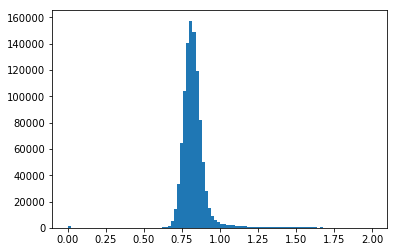

In [90]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# Pull out the first science array, we also need to flatten the data to a 
# 1D array before sending it to hist
sci1 = fits.getdata(test_data,ext=1)
sci1f = sci1.flatten()

# Now we can plot our histogram, using some of the optional keywords in hist
# The hist function returns the values of the histogram bins (n), the edges
# of the bins (obins), and the patches used to create the histogram
fig = plt.figure()
n, obins, patches = plt.hist(sci1f,bins=100,range=(0,2))

# Save resulting figure to png file
fig.savefig('hist.png')

<br>

<a id='imreplace'></a>

## imreplace

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imreplace is used to replace array sections with a constant. We can use simple ``numpy`` array manipulation to replicate imreplace.  For details on how to grow the boolean array for replacement see crgrow, or the [skimage.dilation documentation](http://scikit-image.org/docs/0.12.x/api/skimage.morphology.html?highlight=dilation#skimage.morphology.dilation).

In [3]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [21]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
out_file = 'imreplace_out.fits'

# Pull out the first science array
hdu = fits.open(test_data)
sci1 = hdu[1].data

print("cutout of array before replacements:")
print(sci1[50:55, 50:55])

# Make boolean mask with your requirements, here we produce a boolean mask 
# where all array elements with values >0.5 and <0.6 are set to True.
mask1 = np.logical_and(sci1>0.8, sci1<0.82)

# Use mask to replace values
sci1[mask1] = 99

print("\ncoutout of array after replacements:")
print(sci1[50:55, 50:55])

# Take updated array and write out new FITS file
hdu[1].data = sci1
hdu.writeto(out_file, overwrite=True)

# Close FITS file
hdu.close()

cutout of array before replacements:
[[ 0.89118606  0.87640154  0.81239933  0.77495182  0.80048275]
 [ 0.83939391  0.79715788  0.71130604  0.83452195  0.74553812]
 [ 0.82984501  0.82536161  0.82937354  0.82661521  0.80760878]
 [ 0.88277584  0.78050691  0.85906219  0.80846858  0.8092978 ]
 [ 0.85532236  0.73028219  0.81455106  0.76300722  0.85437953]]

coutout of array after replacements:
[[  0.89118606   0.87640154  99.           0.77495182  99.        ]
 [  0.83939391   0.79715788   0.71130604   0.83452195   0.74553812]
 [  0.82984501   0.82536161   0.82937354   0.82661521  99.        ]
 [  0.88277584   0.78050691   0.85906219  99.          99.        ]
 [  0.85532236   0.73028219  99.           0.76300722   0.85437953]]


In [20]:
# We can also use numpy where to pull out index numbers
mask2 = np.where(sci1 > 1000)
print("Index values where sci1 is > 1,000")
print(mask2)

Index values where sci1 is > 1,000
(array([ 474,  474,  606,  607,  607,  607,  608,  608,  608,  608,  609,
        609,  609,  609,  610,  610,  610,  804,  804,  809,  809,  810,
        883,  883, 1002, 1013]), array([455, 456, 285, 284, 285, 286, 284, 285, 286, 287, 284, 285, 286,
       287, 284, 285, 286, 349, 350,  53, 575,  53, 161, 162, 104, 460]))


<br>

<a id='imslice'></a>

## imslice

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imslice can take a 3-D datacube FITS image and return multiple 2D images sliced through the chosen dimension.  Keep in mind for the python equivalent workflow that the header file from the original input image will be used for all output images, including WCS information.  We will be using [numpy.split](https://docs.scipy.org/doc/numpy/reference/generated/numpy.split.html#numpy.split).

In [5]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [15]:
# Pull image data array and image header
orig_hdu = fits.open('/eng/ssb/iraf_transition/test_data/imstack_out.fits')

print("Here's the extensions in our input file:")
orig_hdu.info()

header1 = orig_hdu[0].header
image1 = orig_hdu[0].data
orig_hdu.close()

print("\noriginal array - the dimension order is listed " +
      "in reverse order \nnow that we have read the array into a numpy array:")
print(image1.shape)

# Slice images easily by using numpy.split, which returns a list of the output arrays
# THen numpy.squeeze is used to remove the extra length one dimensions left over from
# numpy.split.
arr_list = np.split(image1, 2)
arr_list = np.squeeze(arr_list)
print("\nfinal shape of a slice is:")
print(arr_list[0].shape)

# Now we can write this new array into a new FITS files by packing it back into an HDU object
hdu1 = fits.PrimaryHDU(arr_list[0],header1)
hdu1.writeto('imslice_out1.fits', overwrite=True)
hdu2 = fits.PrimaryHDU(arr_list[1],header1)
hdu2.writeto('imslice_out2.fits', overwrite=True)

Here's the extensions in our input file:
Filename: /eng/ssb/iraf_transition/test_data/imstack_out.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SCI           1 PrimaryHDU     199   (4096, 2048, 2)   float32   

original array - the dimension order is listed in reverse order 
now that we have read the array into a numpy array:
(2, 2048, 4096)

final shape of a slice is:
(2048, 4096)


<br>

<a id='imcstack'></a>

## imstack

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

imstack can take multiple FITS images and stack the data, writing out a new file where the FITS data is 1-dimension higher then the input images.  Here we show that manipulation using the ``astropy`` library and [numpy.stack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html#numpy.stack).

In [57]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits

In [29]:
# Pull two image data arrays and an image header
header1 = fits.getheader('/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits',ext=1)
image1 = fits.getdata('/eng/ssb/iraf_transition/test_data/jczgx1ppq_flc.fits')
image2 = fits.getdata('/eng/ssb/iraf_transition/test_data/jczgx1q1q_flc.fits')

# Stack arrays, the new dimension will be put first, unless otherwise specified with the axis keyword
outstack = np.stack((image1,image2))
print("final shape is:")
print(outstack.shape)

# Now we can write this new array into a new FITS file by packing it back into an HDU object
hdu = fits.PrimaryHDU(outstack,header1)
hdu.writeto('imstack_out.fits', overwrite=True)

final shape is:
(2, 2048, 4096)


<br>

<a id='imstatistics'></a>

## imstatistics

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

We will use the ``astropy.stats.sigma_clipped_stats`` function here, which has some wider capabilites then the imstatistics function.  Please see the ``stats`` [package documentation](http://docs.astropy.org/en/stable/api/astropy.stats.sigma_clipped_stats.html) for details on the advanced usage. We also use some Numpy functions for additional statistics.

**Important Note to Users:**
There are some differences in algorithms between the IRAF and Python statistical calculations.  Proceed with care if you are comparing prior IRAF results to Python results.  For more details on this issue see the [filed Github issue](https://github.com/spacetelescope/stak-notebooks/issues/83).

In [2]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.io import fits
from astropy import stats

In [6]:
# Change these values to your desired data files
test_data = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'
sci1 = fits.getdata(test_data, ext=1)

# The sigma_clipped_stats function returns the mean, median, and stddev respectively
# To more closely replicate the IRAF version that is using n-1 in it's calculations
# we use the std_ddof parameter
output = stats.sigma_clipped_stats(sci1, sigma=3.0, iters=3, std_ddof=1)
print("mean, median, standard deviation:")
print(output)

# To see the min and max of an array we can use numpy.min and numpy.max
array_min = np.min(sci1)
array_max = np.max(sci1)
print("\nmin, max")
print("{}, {}".format(array_min, array_max))

# To find out how many pixels are greater then a particular value we can use numpy.where
where_result = np.where(sci1 > 1000)
count = len(where_result[0])
print("\nNumber of pixels above 1,000:")
print(count)

mean, median, standard deviation:
(0.82595410841884809, 0.81768394, 0.074634554991261454)

min, max
-4007.712890625, 27569.6015625

Number of pixels above 1,000:
26


<br>

<a id='imsum'></a>

## imsum

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imsum is used to compute the sum, average, or mean of a set of images. We will be using the ``ccdproc`` ``Combiner`` class here.  Keep in mind that the original FITS header is not retained in the ``CCDData`` object.  Please see the [ccdproc documentation](http://ccdproc.readthedocs.io/en/latest/ccdproc/image_combination.html) for more details.

In [61]:
# Astronomy Specific Imports
from astropy.io import fits
from astropy import units
from ccdproc import CCDData, Combiner

In [64]:
# Change these values to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'
test_data2 = '/eng/ssb/iraf_transition/test_data/iczgs3ygq_flt.fits'

# First we need to pull out the science arrays to create CCDData objects
# Our actual unit is electrons/sec, this is not accepted by the current
# set of units
cdata1 = CCDData.read(test_data1, hdu=1, unit=units.electron/units.s)
cdata2 = cdata1.copy()
cdata3 = CCDData.read(test_data2, hdu=1, unit=units.electron/units.s)
cdata4 = cdata3.copy()
combiner = Combiner([cdata1, cdata2, cdata3, cdata4])

# Now we can make our mask for extrema clipping
# The equivalent of low_reject, high_reject parameter
combiner.clip_extrema(nlow=1, nhigh=1)

# And finally to combine...
final_combine = combiner.average_combine()
print(final_combine.data)

INFO: using the unit electron / s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit electron / s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [astropy.nddata.ccddata]
[[  0.87720111   0.82106587   0.79521415 ...,   3.87308204   7.41545987
    9.01969481]
 [  0.89028609   0.7884455    0.8240625  ...,   0.86163342   4.53510189
    0.99109203]
 [  0.81683022   0.83273572   0.82175627 ...,   3.60699821  -7.82266164
    2.95994186]
 ..., 
 [ 40.72796059  15.36561799  -8.79329443 ...,  22.68277168  25.31048012
   28.829813  ]
 [ 46.28870392  -4.50218874   1.74757147 ...,  13.24364138  25.70440292
   11.0971849 ]
 [ 42.8106432   29.66250706  63.18441772 ...,   0.           9.80057049
   22.66858006]]


<br>

<a id='listpixels'></a>

## listpixels

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Listpixels was used to list an indexed section of a FITS data array.  This is easy to do using ``astropy``, but **keep in mind that Python indexes from zero, and with the y-axis leading, i.e. [y,x]**.  You also want to end the cut with the pixel *after* the end pixel.  So to get 1-10 in x and 5-15 in y, you will index like so: array[4:15,0:10]. To see listpixels results for more then one file, you will need to loop over a list of files, see information about Python loops [here](http://www.pythonforbeginners.com/loops/for-while-and-nested-loops-in-python).

In [70]:
# Astronomy Specific Imports
from astropy.io import fits

In [71]:
# Change this value to your desired data files
test_data1 = '/eng/ssb/iraf_transition/test_data/iczgs3y5q_flt.fits'

# To quickly pull out the data array you can use the astropy convenience function
data_arr = fits.getdata(test_data1,ext=1)

# Now we can index the array as desired
# We're cutting out 5 in y, and 2 in x
print(data_arr[0:5,0:2])

[[ 0.86692303  0.80678135]
 [ 0.83312052  0.76854318]
 [ 0.77341086  0.80276382]
 [ 0.80539584  0.78261763]
 [ 0.78274417  0.82206035]]


<br>

## Not Replacing

* imrename - can use command line utilities or the Python ``os`` package for  this functionality.
* imdelete - can use command line utilities or the Python ``os`` package for  this functionality.
* imtile - **may** replace infuture
* sections - IRAF utility function
* imgets - see [images.imutil.hselect](#hselect)
* minmax - see [images.imutil.imstatistics](#imstatistics)